In [70]:
chooseCRANmirror(graphics=FALSE, ind=1)
install.packages(c("coxed", "survival", "survsim", "survminer"))

Warning message:
"unable to access index for repository http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5:
  cannot open URL 'http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5/PACKAGES'"Warning message:
"packages 'coxed', 'survival', 'survsim', 'survminer' are in use and will not be installed"

In [71]:
library(coxed)
library(survival)
library(survsim)
library(survminer)

## Coxed trial

In [11]:
simdata <- sim.survdata(N=500, T=3650, xvars=2, censor=.2, num.data.frames=1)
attributes(simdata)
# data is full dataset
# xdata is the covariates
# baseline is baseline functions (failure.pdf, failure.cdf, survivor, hazard)
# betas is coefficients used to generate durations
# xb is linear predictor which is coefficients and covariates
# exp.xb is exponentiated values of linear predictor
# ind.survive is the observation survivor functions

$names
[1] "data"             "xdata"            "baseline"         "xb"              
[5] "exp.xb"           "betas"            "ind.survive"      "marg.effect"     
[9] "marg.effect.data"

$class
[1] "simSurvdata"

TableGrob (2 x 1) "arrange": 2 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]
2 2 (2-2,1-1) arrange gtable[layout]

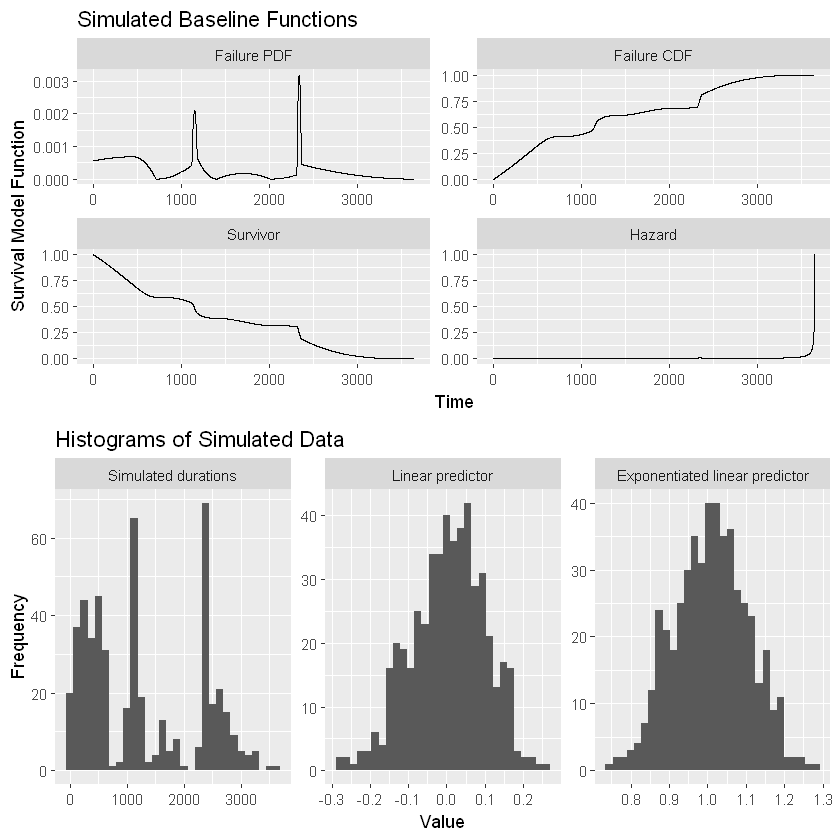

In [12]:
survsim.plot(simdata, df=1, type="both")

In [15]:
head(simdata$data)

X1,X2,y,failed
-2.2230406,-0.58097153,1610,TRUE
1.1379530,-1.68204533,2316,TRUE
0.6095564,0.21901242,1159,FALSE
0.9807852,-2.44959369,1669,FALSE
0.9140289,0.06876344,2813,TRUE
0.7429192,-1.57692352,1150,TRUE


## Survival trial

In [21]:
Surv(aml$time, aml$status)

 [1]   9   13   13+  18   23   28+  31   34   45+  48  161+   5    5    8    8 
[16]  12   16+  23   27   30   33   43   45 

Call: survfit(formula = Surv(aml$time[1:11], aml$status[1:11]) ~ 1)

      n  events  median 0.95LCL 0.95UCL 
     11       7      31      18      NA 


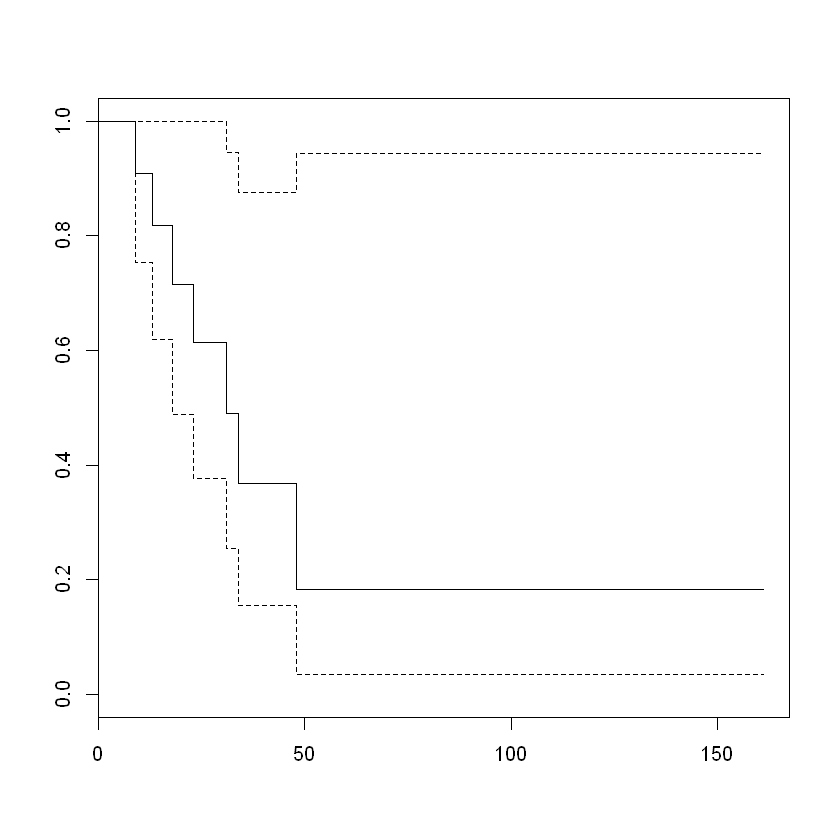

In [60]:
fit <- survfit(Surv(aml$time[1:11],aml$status[1:11])~1)
print(fit)
plot(fit)

In [28]:
# Log-rank example (since rho is 0 by default)
survdiff(Surv(time, status)~x, data=aml)

Call:
survdiff(formula = Surv(time, status) ~ x, data = aml)

                 N Observed Expected (O-E)^2/E (O-E)^2/V
x=Maintained    11        7    10.69      1.27       3.4
x=Nonmaintained 12       11     7.31      1.86       3.4

 Chisq= 3.4  on 1 degrees of freedom, p= 0.07 

In [36]:
x <- (1:30)/2 - 3 # create the covariates, 30 of them
myrates <- exp(3*x+1) # the risk exp(beta*x), parameters for exp r.v.
y <- rexp(30, rate = myrates) # generates the r.v.
survreg(Surv(y,rep(1,30))~x,dist="weibull")$coef[2]
#slope estimate by weibull regression
#we do not have any censoring in the data
coxph(Surv(y,rep(1,30))~x)$coef # estimate from Cox regression


x 
-3.032338

x 
0.3886229

In [37]:
Simu2reg <- function(x , inputrates){
    y <- rexp(length(inputrates), rate=inputrates)
    temp1 <- survreg(Surv(y, rep(1, length(y)))~x,dist="weibull")
    temp2 <- coxph(Surv(y, rep(1, length(y)))~x)
    return(c(temp1$coef[2], temp2$coef))
}

In [38]:
result <- matrix(NA, nrow=2, ncol=5000) #creat a matrix to hold outcome
for(i in 1:100) result[,i]<-Simu2reg(x,myrates) #run the simulation 100 times

## Survsim Trial

In [56]:
dist.ev <- "weibull"
anc.ev <- 1
beta0.ev <- 5.269
dist.cens <- "weibull"
anc.cens <- 1
beta0.cens <- 5.368
x <- list(c("bern", 0.3), c("bern", 0.4))
beta <- list(-0.4, -0.25)
simple.dat <- simple.surv.sim(500, 3650, dist.ev, anc.ev, beta0.ev, dist.cens, anc.cens, beta0.cens, , beta, x)
head(simple.dat,10)

nid,status,start,stop,z,x,x.1
1,0,0,170.86769,1,1,0
2,0,0,3.11462,1,1,0
3,1,0,333.59546,1,0,1
4,0,0,48.12516,1,0,0
5,1,0,202.86212,1,0,0
6,1,0,203.66397,1,0,0
7,0,0,121.19528,1,0,0
8,0,0,92.83497,1,0,1
9,1,0,13.27302,1,1,0
10,0,0,312.58261,1,1,0


In [67]:
res.cox <- coxph(Surv(stop, status) ~ 1, data=simple.dat)
res.cox

Call:  coxph(formula = Surv(stop, status) ~ 1, data = simple.dat)

Null model
  log likelihood= -1497.314 
  n= 500 

In [74]:
fit <- survfit(Surv(stop, status) ~ 1, data = simple.dat)
# Change color, linetype by strata, risk.table color by strata
ggsurvplot(res.cox,
          pval = TRUE, conf.int = TRUE,
          risk.table = TRUE, # Add risk table
          risk.table.col = "strata", # Change risk table color by groups
          linetype = "strata", # Change line type by groups
          surv.median.line = "hv", # Specify median survival
          ggtheme = theme_bw(), # Change ggplot2 theme
          palette = c("#E7B800", "#2E9FDF"))

ERROR: Error in ggsurvplot(res.cox, pval = TRUE, conf.int = TRUE, risk.table = TRUE, : object 'ggsurv' not found
